In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from numpy import mean
from numpy import std
from numpy import absolute
from libpysal.weights.contiguity import Queen
import libpysal
from statsmodels.api import OLS
sns.set_style('white')

In [40]:
import os
os.getcwd()

'C:\\Users\\SarShel\\DEC\\Regression'

In [41]:
os.chdir('C:\\Users\\SarShel\\DEC\\Regression')
os.getcwd()

'C:\\Users\\SarShel\\DEC\\Regression'

In [42]:
# Read S2 dataset 
Data1 = pd.read_csv('data_raw/Indices/S2Data.csv')

# Remove none values
S2Data = Data1.dropna()

# Display the first few rows of our DataFrame
S2Data.head()
print(S2Data)

       Year  Month  Day      2BDA      3BDA      NDCI        B1       B10  \
0      2016      5    7  0.956879 -0.044137 -0.022070  0.117900  0.002955   
1      2016      5    7  0.956959 -0.043948 -0.022029  0.117907  0.002955   
2      2016      5    7  1.015101  0.016830  0.007469  0.147959  0.008728   
3      2016      5    7  0.991688 -0.008969 -0.004225  0.142645  0.007528   
4      2016      5    7  0.881265 -0.110070 -0.063161  0.116655  0.002038   
...     ...    ...  ...       ...       ...       ...       ...       ...   
35028  2020     10   30  0.854190 -0.129064 -0.078726  0.152807  0.001676   
35029  2020     10   30  1.077379  0.065607  0.035775  0.126659  0.001469   
35030  2020     10   30  0.946243 -0.050380 -0.027911  0.134852  0.007321   
35031  2020     10   30  0.962221 -0.039201 -0.019493  0.132445  0.007393   
35032  2020     10   30  0.960195 -0.038782 -0.020508  0.126638  0.006003   

            B11       B12  ...        B3        B4        B5        B6  \
0

In [43]:
# Read Field dataset 
Data2 = pd.read_csv('data_raw/Indices/FieldData.csv')

# Remove none values
FieldData = Data2.dropna()

# Display the first few rows of our DataFrame
#FieldData.head()
print(FieldData)

             Lake Name          Y          X       Date  Year  Month  Day  \
0     Little Long Pond  40.977600 -72.296204   6/4/2016  2016      6    4   
1       Cossayuna Lake  43.200600 -73.423401   6/3/2016  2016      6    3   
2           Hatch Lake  42.834598 -75.677803   6/5/2016  2016      6    5   
3      Montgomery Lake  41.525299 -74.917297   6/4/2016  2016      6    4   
4        Lake Devenoge  41.521000 -74.839401   6/4/2016  2016      6    4   
...                ...        ...        ...        ...   ...    ...  ...   
6070         Long Pond  40.975102 -72.290802  7/26/2020  2020      7   26   
6071         Long Pond  40.975102 -72.290802   8/9/2020  2020      8    9   
6072         Long Pond  40.975102 -72.290802  8/23/2020  2020      8   23   
6073         Long Pond  40.975102 -72.290802   9/7/2020  2020      9    7   
6074         Long Pond  40.975102 -72.290802  9/20/2020  2020      9   20   

       Chl-a  
0      1.200  
1      0.600  
2      2.900  
3      2.900  


In [44]:
# Using merge function by setting how='inner'
MergedData = pd.merge(S2Data, FieldData, on=['Y', 'X', 'Year', 'Month', 'Day'], how='inner')
MergedData.to_csv('data_output/OutlierTest/MergedData.csv')
  
# displaying result
print(MergedData)

      Year  Month  Day      2BDA      3BDA      NDCI        B1       B10  \
0     2016      6    7  0.951738 -0.048882 -0.024856  0.119966  0.000776   
1     2016      6    7  0.951738 -0.048882 -0.024856  0.119966  0.000776   
2     2016      6    7  0.954945 -0.070901 -0.023265  0.111821  0.001138   
3     2016      6    7  0.954945 -0.070901 -0.023265  0.111821  0.001138   
4     2016      6   10  0.975644 -0.026771 -0.012388  0.116193  0.001103   
...    ...    ...  ...       ...       ...       ...       ...       ...   
1482  2020      9   24  1.006182  0.007508  0.003046  0.136534  0.007655   
1483  2020      9   27  0.985506 -0.017302 -0.007349  0.160810  0.001697   
1484  2020      9   27  0.948135 -0.054520 -0.026673  0.270976  0.003162   
1485  2020      9   30  0.906324 -0.089171 -0.049167  0.135859  0.001359   
1486  2020      9   30  1.060907  0.070528  0.027154  0.190724  0.001834   

           B11       B12  ...        B6        B7        B8       B8A  \
0     0.012669

In [45]:
# Descriptive statistics of all variables
list = ['2BDA', '3BDA', 'NDCI', 'Chl-a']
MergedData [list].describe()

,2BDA,3BDA,NDCI,Chl-a
count,1487.000000,1487.000000,1487.000000,1487.000000
mean,0.995474,0.015297,-0.005038,10.526351
std,0.132150,0.191915,0.054806,18.258538
min,0.406412,-0.183174,-0.113502,0.050000
25%,0.916918,-0.093031,-0.042380,1.900000
50%,0.966684,-0.035932,-0.016578,3.900000
75%,1.048701,0.067505,0.023032,9.992000
max,2.165665,2.150818,0.368135,166.300000


C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


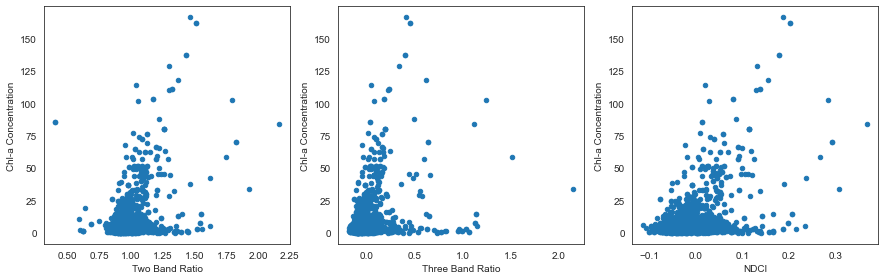

0.4000614611071748 0.28917515561718177 0.44219761482571174


In [46]:
# Scatterplot for Chl-a vs all variables

f,ax = plt.subplots(1,3, figsize=(4*3.1,4))
MergedData[['2BDA','Chl-a']].plot.scatter('2BDA','Chl-a', ax=ax[0])
ax[0].set_xlabel('Two Band Ratio')
ax[0].set_ylabel('Chl-a Concentration')
r1 = np.corrcoef(MergedData['2BDA'].values, MergedData['Chl-a'].values)[0,1]

MergedData[['3BDA','Chl-a']].plot.scatter('3BDA','Chl-a', ax=ax[1])
ax[1].set_xlabel('Three Band Ratio')
ax[1].set_ylabel('Chl-a Concentration')
r2 = np.corrcoef(MergedData['3BDA'].values, MergedData['Chl-a'].values)[0,1]

MergedData[['NDCI','Chl-a']].plot.scatter('NDCI','Chl-a', ax=ax[2])
ax[2].set_xlabel('NDCI')
ax[2].set_ylabel('Chl-a Concentration')
r3 = np.corrcoef(MergedData['NDCI'].values, MergedData['Chl-a'].values)[0,1]

f.tight_layout()
plt.show()
print(r1,r2,r3)

In [47]:
# Pearson Coefficient 
MergedData[['2BDA', '3BDA', 'NDCI', 'Chl-a']].corr(method='pearson')

,2BDA,3BDA,NDCI,Chl-a
2BDA,1.000000,0.901674,0.947186,0.400061
3BDA,0.901674,1.000000,0.912430,0.289175
NDCI,0.947186,0.912430,1.000000,0.442198
Chl-a,0.400061,0.289175,0.442198,1.000000


In [48]:
# Pearson Coefficient 
MergedData[['2BDA', '3BDA', 'NDCI', 'Chl-a']].corr(method='spearman')

,2BDA,3BDA,NDCI,Chl-a
2BDA,1.000000,0.970467,0.976571,0.242132
3BDA,0.970467,1.000000,0.992645,0.254440
NDCI,0.976571,0.992645,1.000000,0.249792
Chl-a,0.242132,0.254440,0.249792,1.000000


In [49]:
# Getting column names
X_columns = ["2BDA", "3BDA", "NDCI"]
Y = MergedData["Chl-a"]

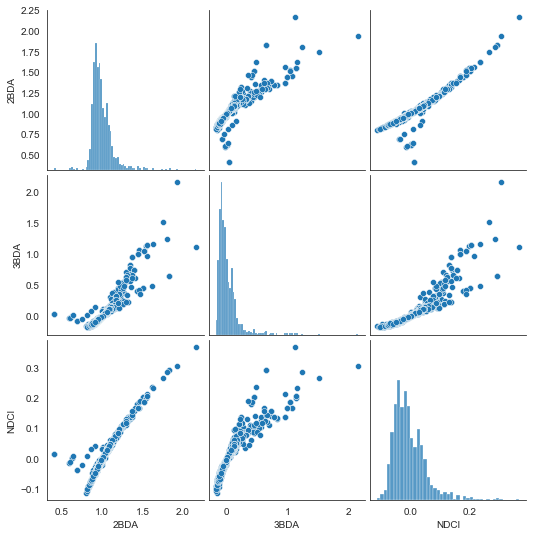

In [50]:
# Use seaborn.pairplot to plot a scatterplot matrix of independent variables (X)
sns.pairplot(MergedData[X_columns])

In [51]:
?variance_inflation_factor

In [52]:
#Calculate VIFs on our dataset
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(MergedData[X_columns[0:3]].values, i) for i in range(MergedData[X_columns[0:3]].shape[1])]
vif["features"] = MergedData[X_columns[0:3]].columns

In [53]:
vif.round()

,VIF Factor,features
0,1.0,2BDA
1,6.0,3BDA
2,6.0,NDCI


In [54]:
#OLS model based on Three predictors (2BDA,3BDA,NDCI)
# Extract independent variables (predictors) 
X = MergedData[X_columns]

# Extract dependent variable (prediction)
Y = MergedData['Chl-a']

model = OLS(Y,X)
results = OLS(Y,X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Chl-a   R-squared (uncentered):                   0.455
Model:                            OLS   Adj. R-squared (uncentered):              0.454
Method:                 Least Squares   F-statistic:                              413.3
Date:                Mon, 21 Feb 2022   Prob (F-statistic):                   4.14e-195
Time:                        10:38:35   Log-Likelihood:                         -6190.6
No. Observations:                1487   AIC:                                  1.239e+04
Df Residuals:                    1484   BIC:                                  1.240e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [55]:
X = MergedData[X_columns]
Y = MergedData['Chl-a']

model = OLS(Y, X)
results = OLS(Y, X).fit()

# prediction
MergedData['Yhat1'] = results.predict(X)
print('predicted Y:', MergedData['Yhat1'])
print('original Y:', Y)

predicted Y: 0        7.679165
1        7.679165
2        9.722356
3        9.722356
4       10.641788
          ...    
1482    13.859161
1483    11.806257
1484     7.407628
1485     1.729101
1486    18.343923
Name: Yhat1, Length: 1487, dtype: float64
original Y: 0       8.1000
1       8.1000
2       0.7000
3       0.7000
4       4.0000
         ...  
1482    0.2898
1483    2.8560
1484    7.3620
1485    3.4640
1486    3.2140
Name: Chl-a, Length: 1487, dtype: float64


In [56]:
mae = metrics.mean_absolute_error(Y, MergedData['Yhat1'])
print("MAE:",mae)

MAE: 10.218305113125215


In [68]:
# Function to Detection Outlier on in-situ Chl-a.
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    data_std = std(MergedData['Chl-a'])
    data_mean = mean(MergedData['Chl-a'])
    anomaly_cut_off = data_std * 3
    
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    print('Lower Limit:', lower_limit)
    print('Upper Limit:', upper_limit)
    # Generate outliers
    for outlier in MergedData['Chl-a']:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

find_anomalies(MergedData['Chl-a'])

Lower Limit: -44.2308423131109
Upper Limit: 65.2835452048392


[85.5,
 85.5,
 111.0,
 111.0,
 70.0,
 70.0,
 72.6,
 72.6,
 66.0,
 66.0,
 114.4,
 68.2,
 161.8,
 161.8,
 84.3,
 128.7,
 102.6,
 136.98,
 136.98,
 74.24,
 103.38,
 103.38,
 76.44,
 76.44,
 76.92,
 88.16,
 101.5,
 79.8,
 79.8,
 79.8,
 79.8,
 166.3,
 117.88,
 110.02,
 69.16]

In [72]:
# Function to Detection Outlier on predicted value of Chl-a.
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies_prediction = []
    
    # Set upper and lower limit to 3 standard deviation
    data_std = std(MergedData['Yhat1'])
    data_mean = mean(MergedData['Yhat1'])
    anomaly_cut_off = data_std * 3
    
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    print('Lower Limit:', lower_limit)
    print('Upper Limit:', upper_limit)
    # Generate outliers
    for outlier in MergedData['Yhat1']:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies_prediction.append(outlier)
    return anomalies_prediction

find_anomalies(MergedData['Chl-a'])

Lower Limit: -18.158924001702935
Upper Limit: 39.20051732916449


[47.81640355736881,
 47.81640355736881,
 78.48845612684751,
 78.48845612684751,
 56.88590143170894,
 56.879951121084645,
 39.42274148179255,
 67.38879738652003,
 76.01892891055643,
 51.77165842903049,
 51.7896492291746,
 41.43588138970751,
 41.44379188676481,
 41.46154336487172,
 41.42557253695654,
 53.93417984695752,
 45.04161353540752,
 39.293705478965926,
 58.356593370695045]

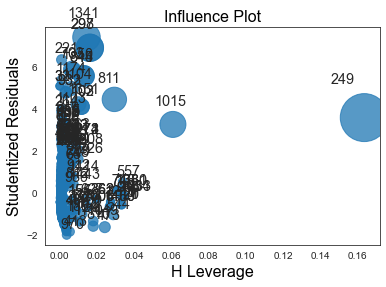

In [57]:
sm.graphics.influence_plot(results)
plt.show()

In [75]:

X_columns = MergedDat.drop(["Year", "Month", "Day", "X", "Y", "Yhat1"], axis = 1)

# calculate the correlation matrix
corr = MergedData[X_columns].corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

NameError: name 'MergedDat' is not defined